In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [3]:
keg_data = pd.read_csv('KegAirData.csv', parse_dates=[0], index_col='DateTime')

purple_data = pd.read_csv('PurpleAirData.csv', parse_dates=[0], index_col='DateTime')

In [4]:
#converting fahrenheit to celcius in purple data
purple_data.columns

purple_data['temp_f'] = ((purple_data['temp_f']-32) / (9/5))
purple_data.rename(columns={'temp_f': 'temp_c'}, inplace=True)

purple_data.columns

Index(['temp_c', 'humidity', 'pressure', 'pm1_0a', 'pm2_5a', 'pm10_0a',
       'pm1_0b', 'pm2_5b', 'pm10_0b'],
      dtype='object')

In [5]:
#Rounding datasets to 2.dp
keg_data = keg_data.round(2)
purple_data = purple_data.round(2)

In [6]:
#Combining the 2 datasets

#rename columns of each data set
print(purple_data.columns)
print(keg_data.columns)

# # Changing the first 3 rows for each dataset
# for idx in keg_data.columns[:3]:
#     keg_data.rename(columns={str(idx) : str(idx)+'_keg'}, inplace=True)

# for idx in purple_data.columns[:3]:
#     purple_data.rename(columns={str(idx) : str(idx)+'_ppl'}, inplace=True)        

total_df = purple_data.join(keg_data, how='inner', lsuffix='_ple', rsuffix='_keg')


Index(['temp_c', 'humidity', 'pressure', 'pm1_0a', 'pm2_5a', 'pm10_0a',
       'pm1_0b', 'pm2_5b', 'pm10_0b'],
      dtype='object')
Index(['temp_c', 'humidity', 'pressure', 'pm1_0k', 'pm2_5k', 'pm10_0k'], dtype='object')


In [7]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4048 entries, 2024-05-29 15:30:00 to 2024-06-05 10:12:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp_c_ple    4048 non-null   float64
 1   humidity_ple  4048 non-null   float64
 2   pressure_ple  4048 non-null   float64
 3   pm1_0a        4048 non-null   float64
 4   pm2_5a        4048 non-null   float64
 5   pm10_0a       4048 non-null   float64
 6   pm1_0b        4048 non-null   float64
 7   pm2_5b        4048 non-null   float64
 8   pm10_0b       4048 non-null   float64
 9   temp_c_keg    4048 non-null   float64
 10  humidity_keg  4048 non-null   float64
 11  pressure_keg  4048 non-null   float64
 12  pm1_0k        4048 non-null   float64
 13  pm2_5k        4048 non-null   float64
 14  pm10_0k       4048 non-null   float64
dtypes: float64(15)
memory usage: 506.0 KB


In [8]:
total_df.to_csv('CombinedData.csv')

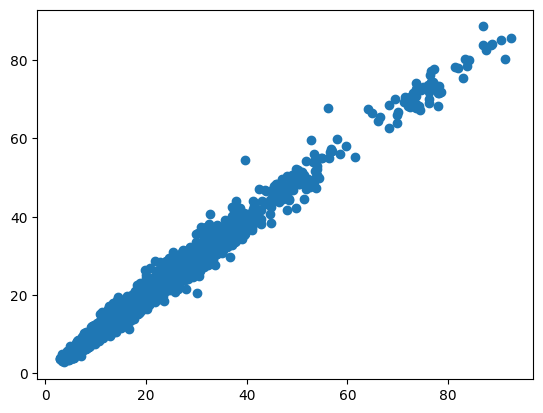

In [9]:
plt.scatter(total_df['pm2_5k'], total_df['pm2_5a'])

<Axes: xlabel='pm2_5k', ylabel='pm2_5a'>

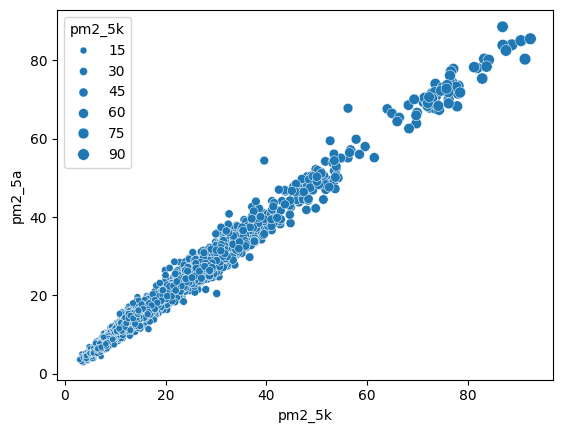

In [10]:

sns.scatterplot(data=total_df, x='pm2_5k', y='pm2_5a', size='pm2_5k')

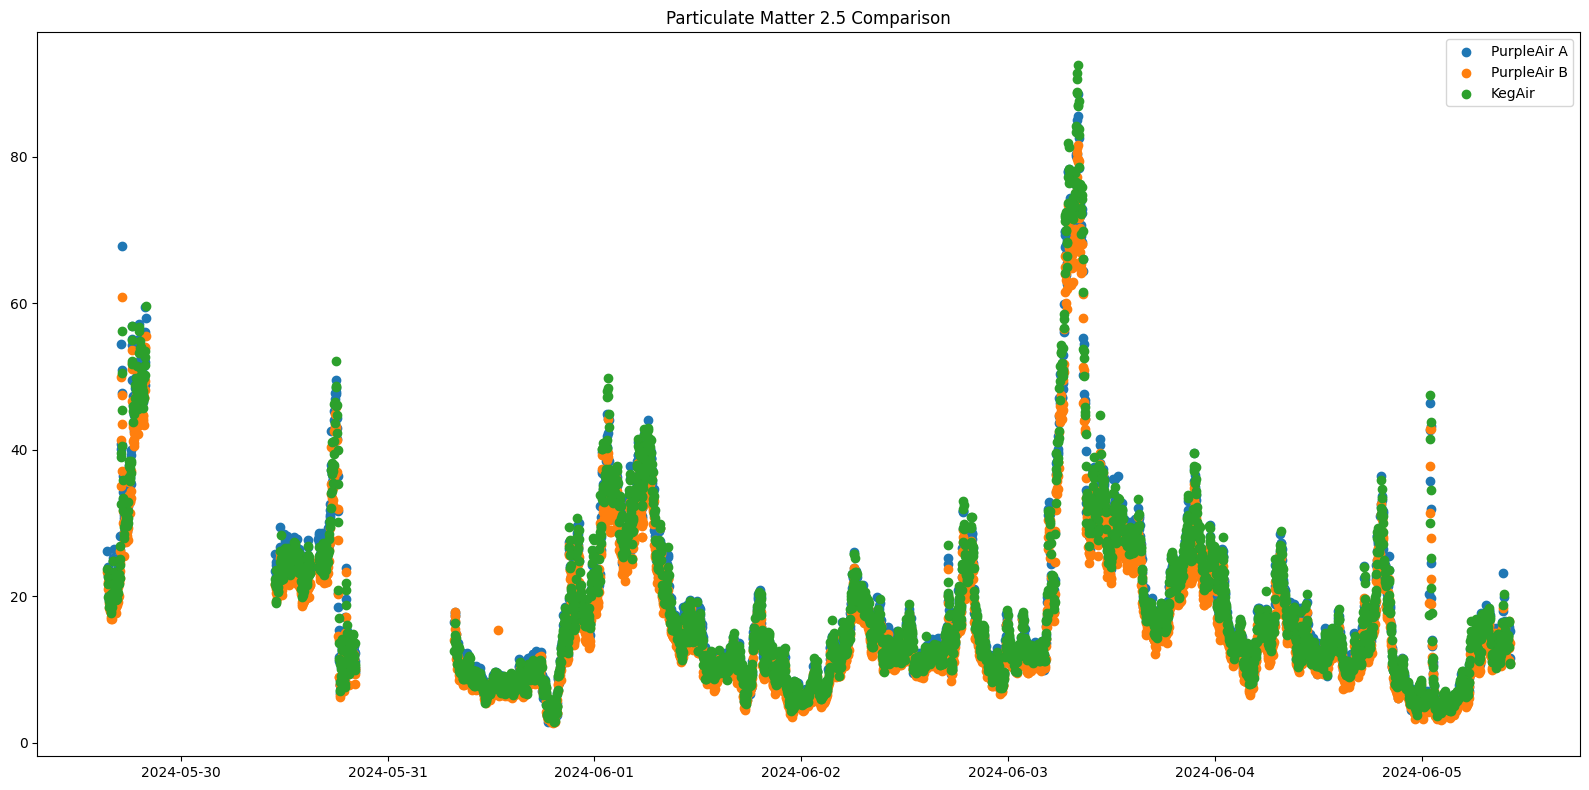

In [11]:
plt.figure(figsize=(16,8))

plt.title('Particulate Matter 2.5 Comparison')
plt.scatter(total_df.index, 'pm2_5a', data=total_df, label='PurpleAir A')
plt.scatter(total_df.index, 'pm2_5b', data=total_df, label='PurpleAir B')
plt.scatter(total_df.index, 'pm2_5k', data=total_df, label='KegAir')

plt.legend()
plt.tight_layout()

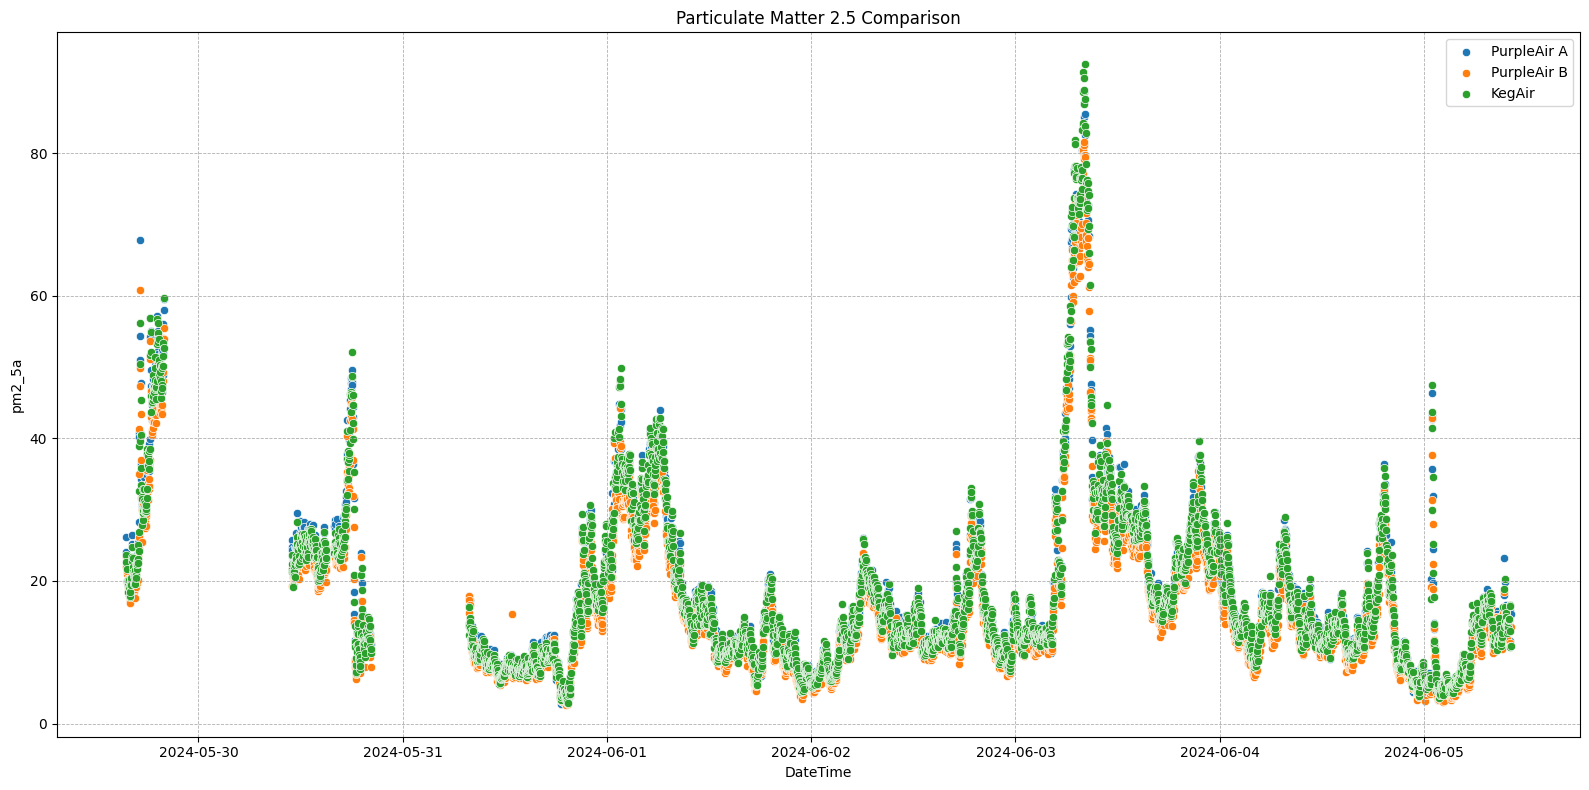

In [12]:
plt.figure(figsize=(16,8))

plt.title('Particulate Matter 2.5 Comparison')
sns.scatterplot(data=total_df, x=total_df.index, y='pm2_5a', label='PurpleAir A')
sns.scatterplot(data=total_df, x=total_df.index, y='pm2_5b', label='PurpleAir B')
sns.scatterplot(data=total_df, x=total_df.index, y='pm2_5k', label='KegAir')
# sns.choose_dark_palette('rgb')

plt.grid(True, which='both', linestyle='--', linewidth=0.6)
plt.tight_layout()

In [13]:
total_df['pressure_keg'] = total_df['pressure_keg'] / 100
total_df.round(2)
desdata = total_df.describe()
print(desdata)

desdata.to_csv('Des_Tab.csv')

        temp_c_ple  humidity_ple  pressure_ple       pm1_0a       pm2_5a  \
count  4048.000000   4048.000000   4048.000000  4048.000000  4048.000000   
mean     32.250509     53.633646    983.738209    12.032643    18.221495   
std       3.152646      9.156057      1.547240     8.196220    11.923547   
min      26.110000     34.000000    977.630000     1.440000     2.800000   
25%      29.440000     45.000000    982.667500     6.850000    10.640000   
50%      31.670000     56.000000    983.990000     9.520000    14.510000   
75%      35.000000     62.000000    984.910000    15.642500    23.522500   
max      39.440000     73.000000    986.600000    60.660000    88.580000   

           pm10_0a       pm1_0b       pm2_5b      pm10_0b   temp_c_keg  \
count  4048.000000  4048.000000  4048.000000  4048.000000  4048.000000   
mean     19.365944    11.284790    16.622470    17.038666    30.265356   
std      12.429314     7.647096    11.156436    11.336076     3.424857   
min       2.800000 

In [14]:
#Create a groupby and pivot table
total_df['hour'] = total_df.index.hour
total_grp = total_df.groupby(['hour'])[['pm2_5k', 'pm2_5a', 'pm2_5b']].mean()
total_grp.head()

,pm2_5k,pm2_5a,pm2_5b
hour,,,
0,15.217379,14.931724,13.643655
1,17.565600,17.105733,15.511467
2,14.688667,14.244200,13.028400
3,13.873267,13.387800,12.155733
4,16.803533,16.405000,15.038333


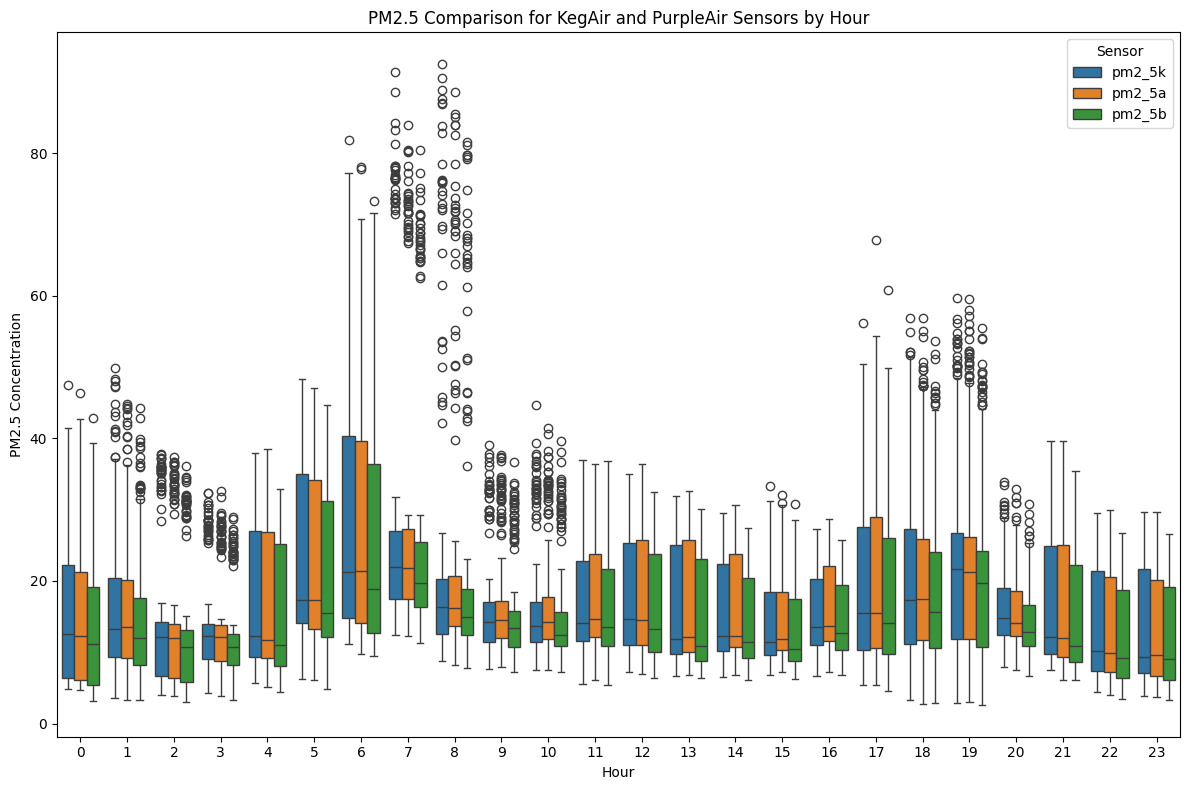

In [15]:

# Reshape the DataFrame
melted_data = pd.melt(total_df, id_vars=['hour'], value_vars=['pm2_5k', 'pm2_5a', 'pm2_5b'], var_name='Sensor', value_name='value')


plt.figure(figsize=(12,8))
# Draw the boxplot
sns.boxplot(data=melted_data, x='hour', y='value', hue='Sensor')
plt.xlabel('Hour')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Comparison for KegAir and PurpleAir Sensors by Hour')
# plt.legend("Sensors")
plt.tight_layout()
plt.show()

# total_grp.melt()

In [16]:
def compare_plot(pmtype : str, dataf=total_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    plt.suptitle(f'{ pmtype.upper().replace("_", ".") } Comparison for KegAir and PurpleAir Sensors', weight='bold', fontsize=18)
    
    pmkeg = str(pmtype + 'k')
    pmpur_a = str(pmtype + 'a')
    pmpur_b = str(pmtype + 'b')

    # scatter for purple A
    sns.scatterplot(data=dataf, x=pmkeg, y=pmpur_a, label='PurpleAir A', color='red', ec='black', ax=ax1)

    # scatter for purple B
    sns.scatterplot(data=dataf, x=pmkeg, y=pmpur_b, label='PurpleAir B', color='blue', ec='black', ax=ax1)

    #Finding correlation coefficient between pm2.5 readings
    pcorr_a = np.corrcoef(dataf[pmkeg], dataf[pmpur_a]).mean()
    pcorr_b = np.corrcoef(dataf[pmkeg], dataf[pmpur_b]).mean()

    #finding the bias
    def calculate_bias(df):
        # Calculate the bias between pmkeg and pmpur_a
        bias_a = (df[pmkeg] - df[pmpur_a]).mean().round(4)
        bias_b = (df[pmkeg] - df[pmpur_b]).mean().round(4)
        
        return bias_a, bias_b

    a_bias, b_bias = calculate_bias(dataf)


    ax1.plot(range(101), range(101), label='x=y line', color='black', zorder=-1)

    #plotting the line of regression for both 
    sns.regplot(data=dataf, x=pmkeg, y=pmpur_a, label=f'r = {pcorr_a.round(4)} : bias = {a_bias}',
                color='red', scatter=False, ax=ax1)
    sns.regplot(data=dataf, x=pmkeg, y=pmpur_b, label=f'r = {pcorr_b.round(4)} : bias = {b_bias}', 
                color='#1000FF', scatter=False, ax=ax1)


    handles, labels = ax1.get_legend_handles_labels()

    ax1.legend(handles[0:2], labels, title='PurpleAir Type', loc='upper left')
    fig.legend(handles[2:], labels[2:], bbox_to_anchor=(0.27, 0.91), ncol=1)


    ## line plot
    sns.lineplot(data=dataf, x=dataf.index, y=pmpur_a, 
                    label='PurpleAir A', color='red', ax=ax2)
    sns.lineplot(data=dataf, x=dataf.index, y=pmkeg, 
                    label='KegAir', color='green', ax=ax2)
    sns.lineplot(data=dataf, x=dataf.index, y=pmpur_b, 
                    label='PurpleAir B', color='blue', ax=ax2)

    ax2.set_ylabel(r'Particulate Matter Concentration ($\mu g/m^3$)')
    ax2.set_title('Line Plot')
    
    ax1.set_xlabel('KegAir')
    ax1.set_ylabel('PurpleAir A & B')
    ax1.set_title('Scatter Plot')
    ax1.set_xlim(0,100)
    ax1.set_ylim(0,100)
    
    if pmtype == 'pm1_0':
        ax1.set_xlim(0,70)
        ax1.set_ylim(0,70)



    # Customize style
    sns.set_style('whitegrid')

    plt.tight_layout()
    # plt.savefig(f"images/compare_{pmtype}.jpg", dpi=600)
    plt.show()

    print(handles, labels)

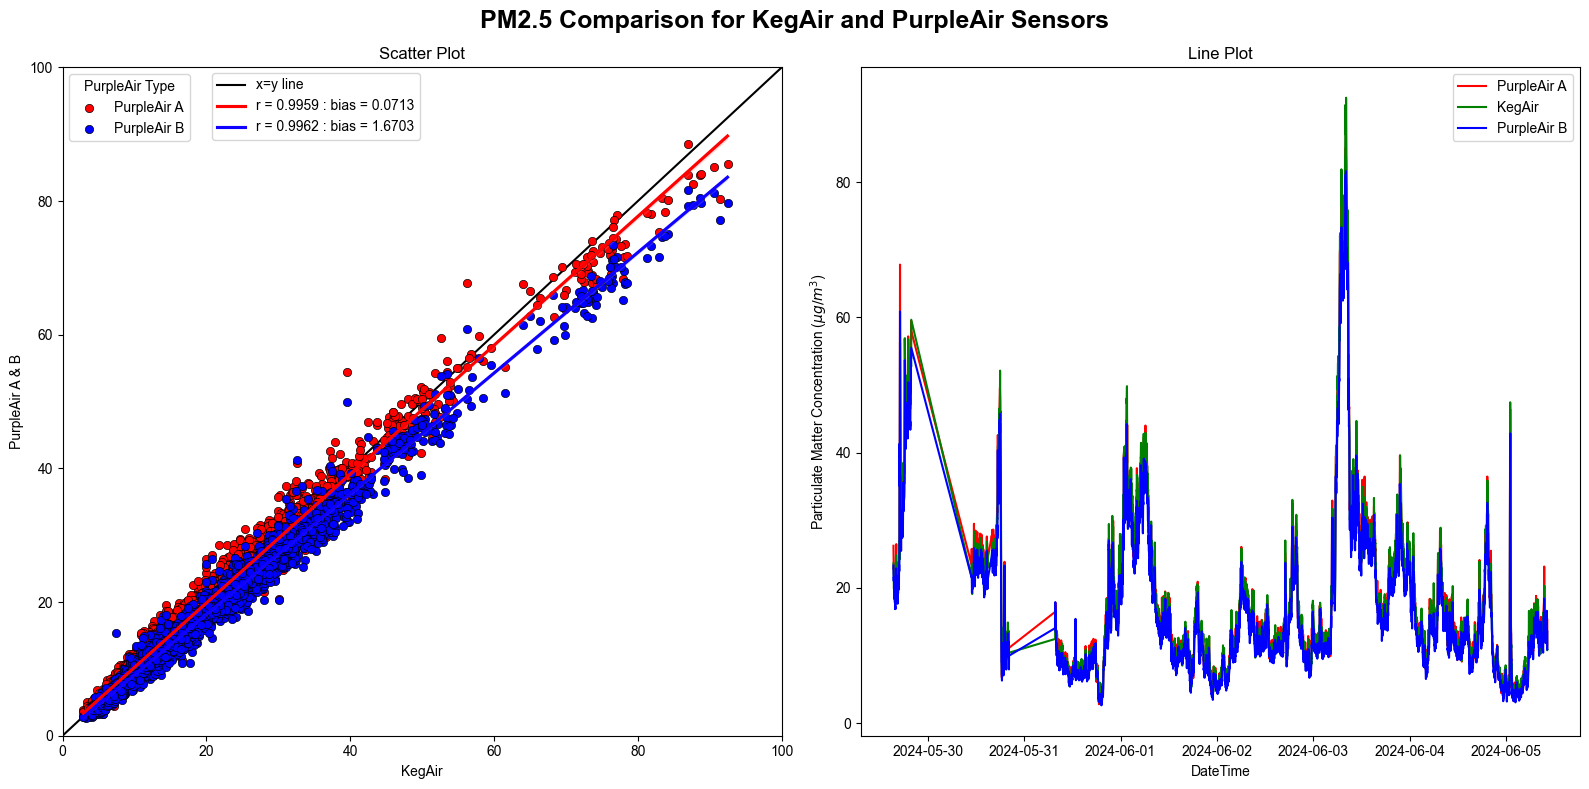

[<matplotlib.collections.PathCollection object at 0x0000029D153E4730>, <matplotlib.collections.PathCollection object at 0x0000029D14F57940>, <matplotlib.lines.Line2D object at 0x0000029D14F55600>, <matplotlib.lines.Line2D object at 0x0000029D14F68A90>, <matplotlib.lines.Line2D object at 0x0000029D14F68BE0>] ['PurpleAir A', 'PurpleAir B', 'x=y line', 'r = 0.9959 : bias = 0.0713', 'r = 0.9962 : bias = 1.6703']


In [17]:
compare_plot('pm2_5')

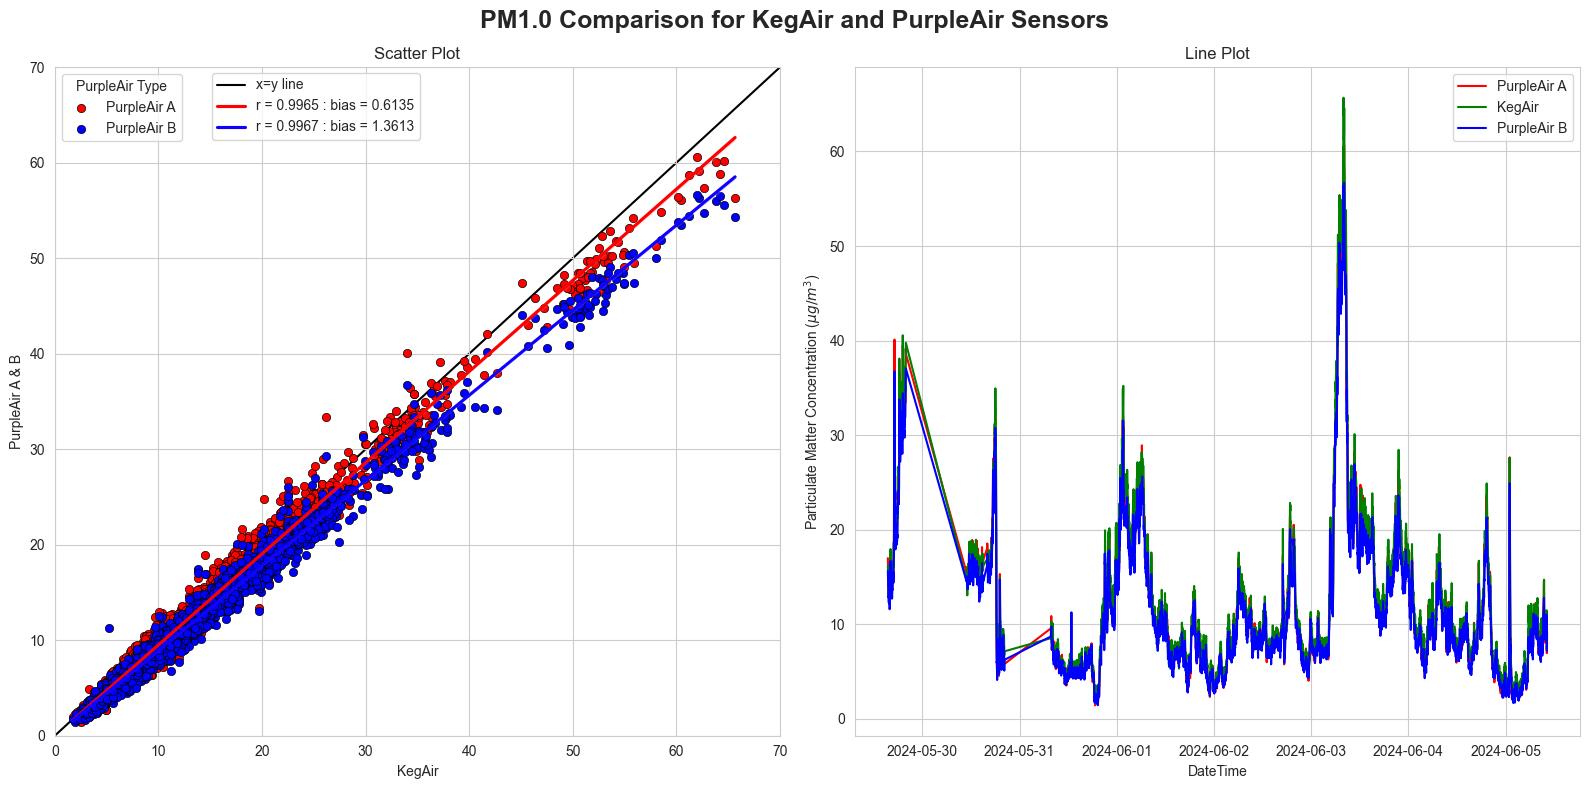

[<matplotlib.collections.PathCollection object at 0x0000029D14F6BCD0>, <matplotlib.collections.PathCollection object at 0x0000029D11680670>, <matplotlib.lines.Line2D object at 0x0000029D11680D00>, <matplotlib.lines.Line2D object at 0x0000029D153BFFD0>, <matplotlib.lines.Line2D object at 0x0000029D1194A9B0>] ['PurpleAir A', 'PurpleAir B', 'x=y line', 'r = 0.9965 : bias = 0.6135', 'r = 0.9967 : bias = 1.3613']


In [18]:
compare_plot('pm1_0')

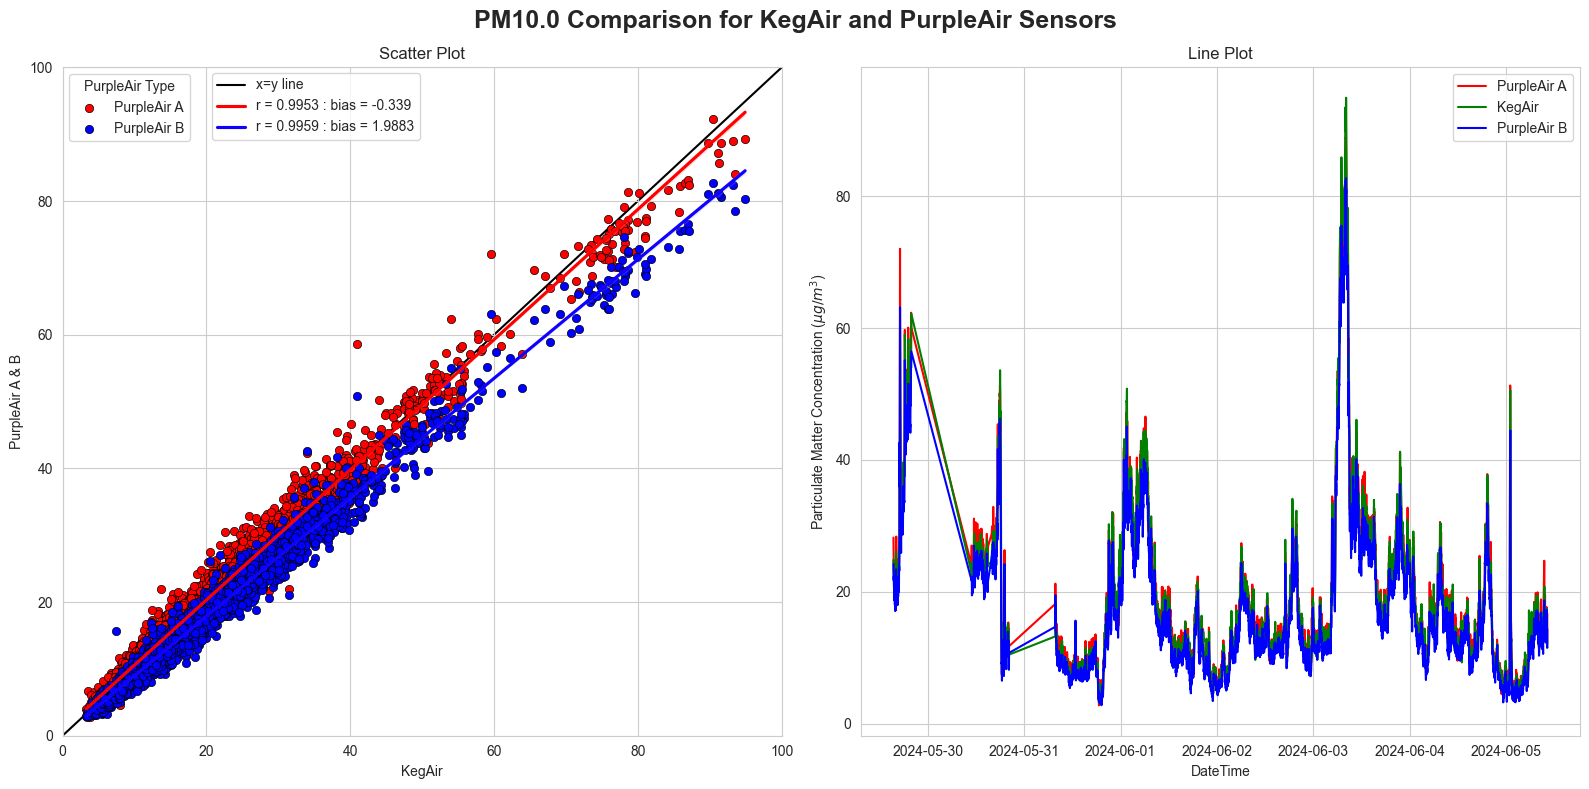

[<matplotlib.collections.PathCollection object at 0x0000029D150C19F0>, <matplotlib.collections.PathCollection object at 0x0000029D15131570>, <matplotlib.lines.Line2D object at 0x0000029D151233D0>, <matplotlib.lines.Line2D object at 0x0000029D151320B0>, <matplotlib.lines.Line2D object at 0x0000029D151322F0>] ['PurpleAir A', 'PurpleAir B', 'x=y line', 'r = 0.9953 : bias = -0.339', 'r = 0.9959 : bias = 1.9883']


In [19]:
compare_plot('pm10_0')

In [20]:
def compare_boxplot_grouped(pmtype: str, dataf= total_df):
    # Create a 'hour' column based on the index (assuming the index is a datetime object)
    dataf['hour'] = dataf.index.hour

    # Initialize the figure
    plt.figure(figsize=(16, 8))
    plt.suptitle(f'{pmtype.upper().replace("_", ".")} Comparison for KegAir and PurpleAir Sensors by Hour', weight='bold', fontsize=18)

    # Prepare data for plotting
    pmkeg = pmtype + 'k'
    pmpur_a = pmtype + 'a'
    pmpur_b = pmtype + 'b'

    # Melt the dataframe to long format for sns.boxplot
    melted_df = dataf.melt(id_vars=['hour'], value_vars=[pmkeg, pmpur_a, pmpur_b], var_name='Sensor', value_name='Concentration')
    
    # Map original column names to more descriptive names
    sensor_map = {pmkeg: 'KegAir', pmpur_a: 'PurpleAir A', pmpur_b: 'PurpleAir B'}
    melted_df['Sensor'] = melted_df['Sensor'].map(sensor_map)
    
    # Create the boxplot
    sns.boxplot(data=melted_df, x='hour', y='Concentration', hue='Sensor', palette=['red','green','blue'], showfliers=False)

    # Customize the plot
    plt.xlabel('Hour')
    plt.ylabel(f'{pmtype.upper().replace("_", ".")} Concentration ($\mu g/m^3$)')
    plt.legend(title='Sensor', loc='upper right')
    plt.tight_layout()
    
    # plt.savefig(f"images/box_{pmtype}.jpg", dpi=600)
    plt.show()

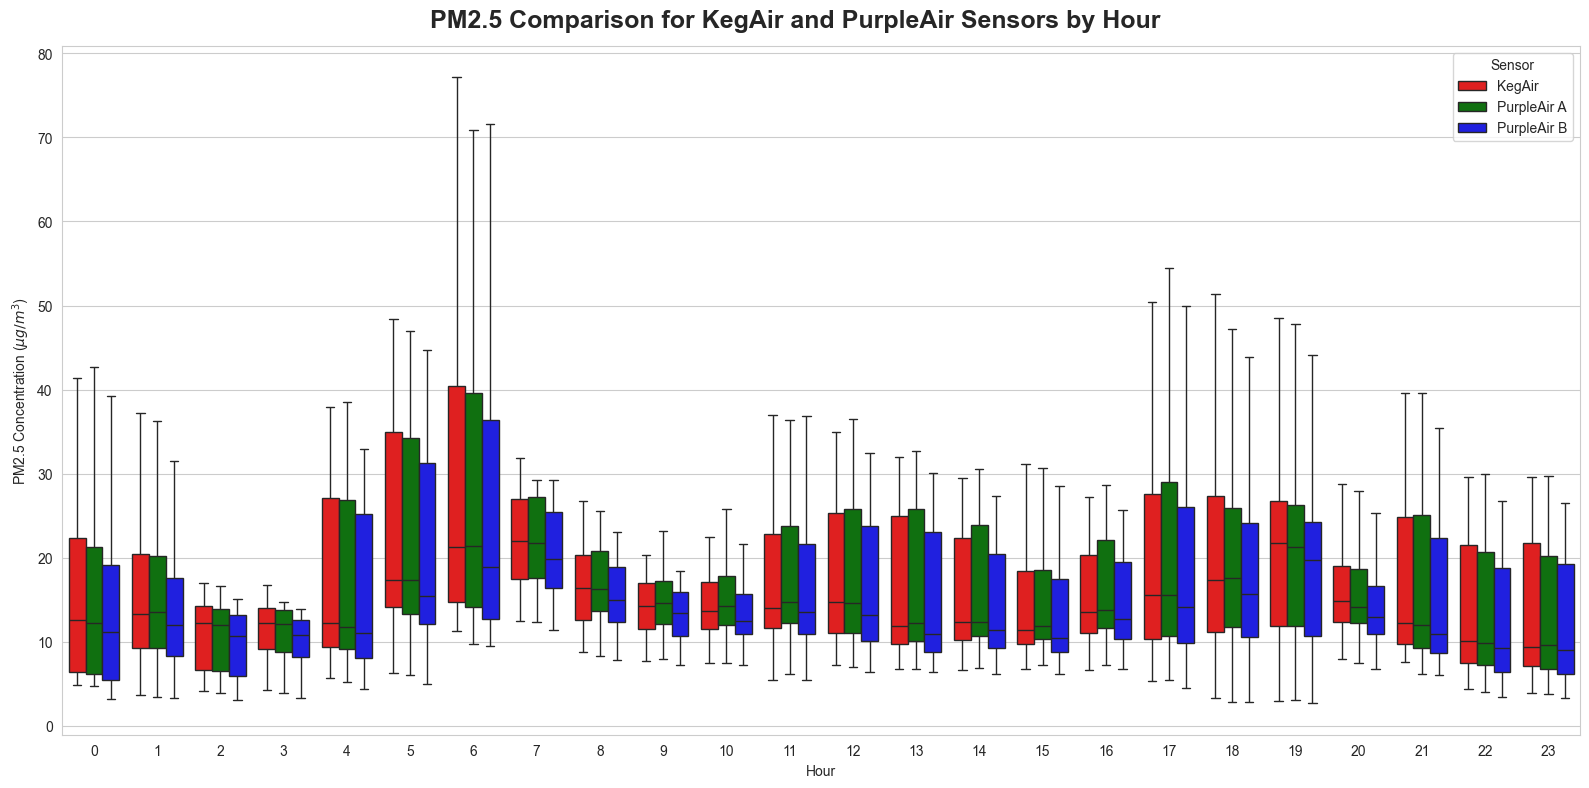

In [21]:
compare_boxplot_grouped('pm2_5')

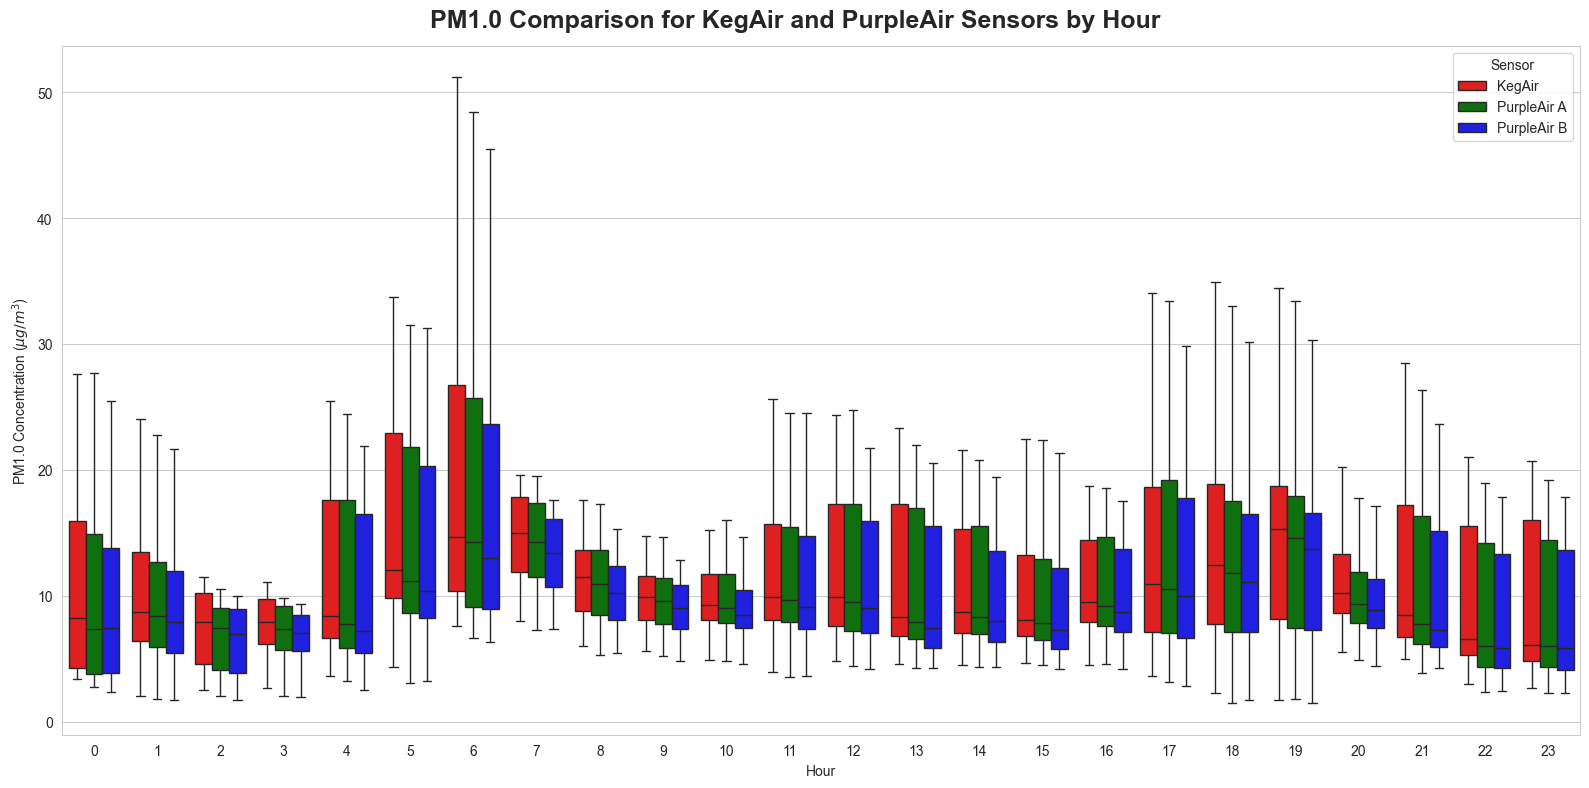

In [22]:
compare_boxplot_grouped('pm1_0')

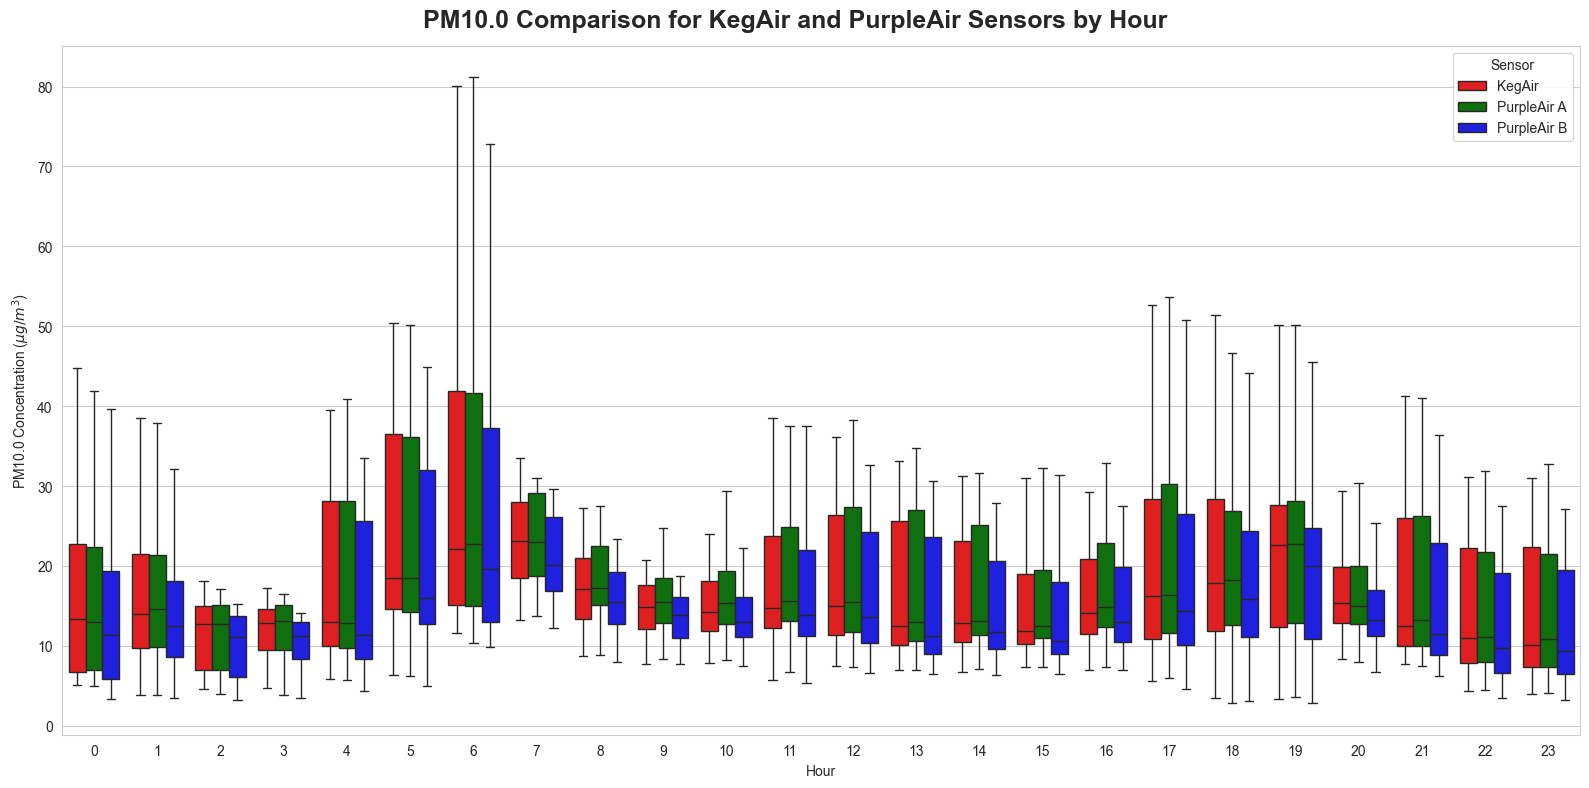

In [23]:
compare_boxplot_grouped('pm10_0')

Comparing Environmental Variable

NameError: name 'env_variables' is not defined

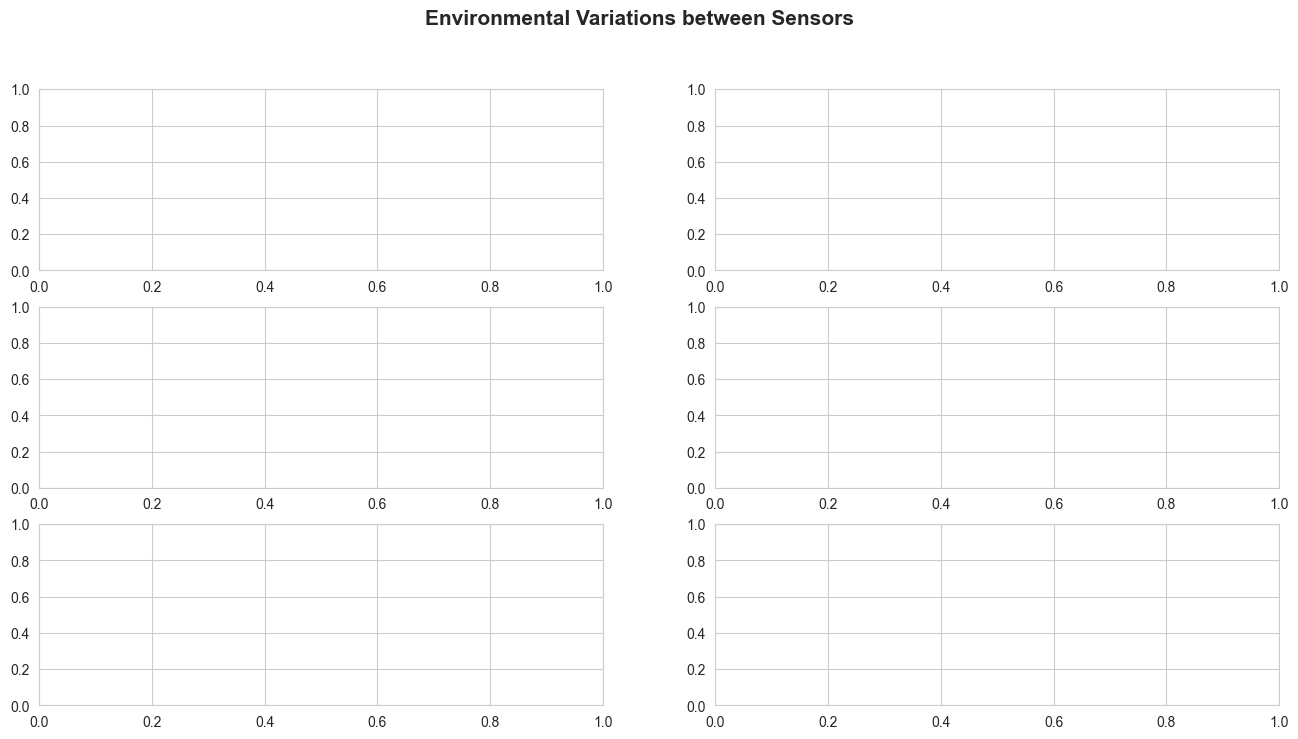

In [98]:
#Finding correlation coefficient and bias
def calc_corr_bias(env_val1, env_val2, df=total_df):
    corr = np.corrcoef(df[env_val1], df[env_val2]).mean().round(4)
    bias = ( df[env_val1]- df[env_val2]).mean().round(4)
    
    return corr, bias

#function to find the plot limits
def plot_limit(env_val1, env_val2, df=total_df):
    l_fact = 1
    x_lim = (df[env_val1].min()-l_fact, df[env_val1].max()+l_fact)
    y_lim = (df[env_val2].min()-l_fact, df[env_val2].max()+l_fact)
    
    return x_lim, y_lim



# Define a function to plot scatter and regression plots
def plot_scatter_and_reg(variable, label, ax):
    corr, bias = calc_corr_bias(f'{variable}_keg', f'{variable}_ple')
    x_lim, y_lim = plot_limit(f'{variable}_keg', f'{variable}_ple')
    sns.scatterplot(data=total_df, x=f'{variable}_keg', y=f'{variable}_ple', ec='#c9c9c9', ax=ax)
    sns.regplot(data=total_df, x=f'{variable}_keg', y=f'{variable}_ple', scatter=False, color='red', 
                label=f'r = {corr} : bias = {bias}', ax=ax)
    ax.set(xlim=x_lim, ylim=y_lim, xlabel=f'{label}-KegAir', ylabel=f'{label}-PurpleAir', title=f'{label} Comparison')
    ax.legend(loc='upper left')

# Define a function to plot line plots
def plot_line(variable, label, ax):
    sns.lineplot(data=total_df, x=total_df.index, y=f'{variable}_keg', label='KegAir', color='red', ax=ax)
    sns.lineplot(data=total_df, x=total_df.index, y=f'{variable}_ple', label='PurpleAir', color='purple', ax=ax)
    ax.set_ylabel(f'{label} ({variable})')

# Main plotting function
def plot_environmental_variations():
    fig, axes = plt.subplots(3, 2, figsize=(16, 8))
    plt.suptitle('Environmental Variations between Sensors', weight='bold', fontsize=15)
    sns.set_style('whitegrid')

    for i, (variable, label) in enumerate(env_variables.items()):
        plot_scatter_and_reg(variable, label, axes[i, 0])
        plot_line(variable, label, axes[i, 1])

    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()

# Call the main plotting function
plot_environmental_variations()

X boundaries: (23.95, 38.97) 
 Y bounds: (25.11, 40.44)
X boundaries: (38.76, 77.2) 
 Y bounds: (33.0, 74.0)


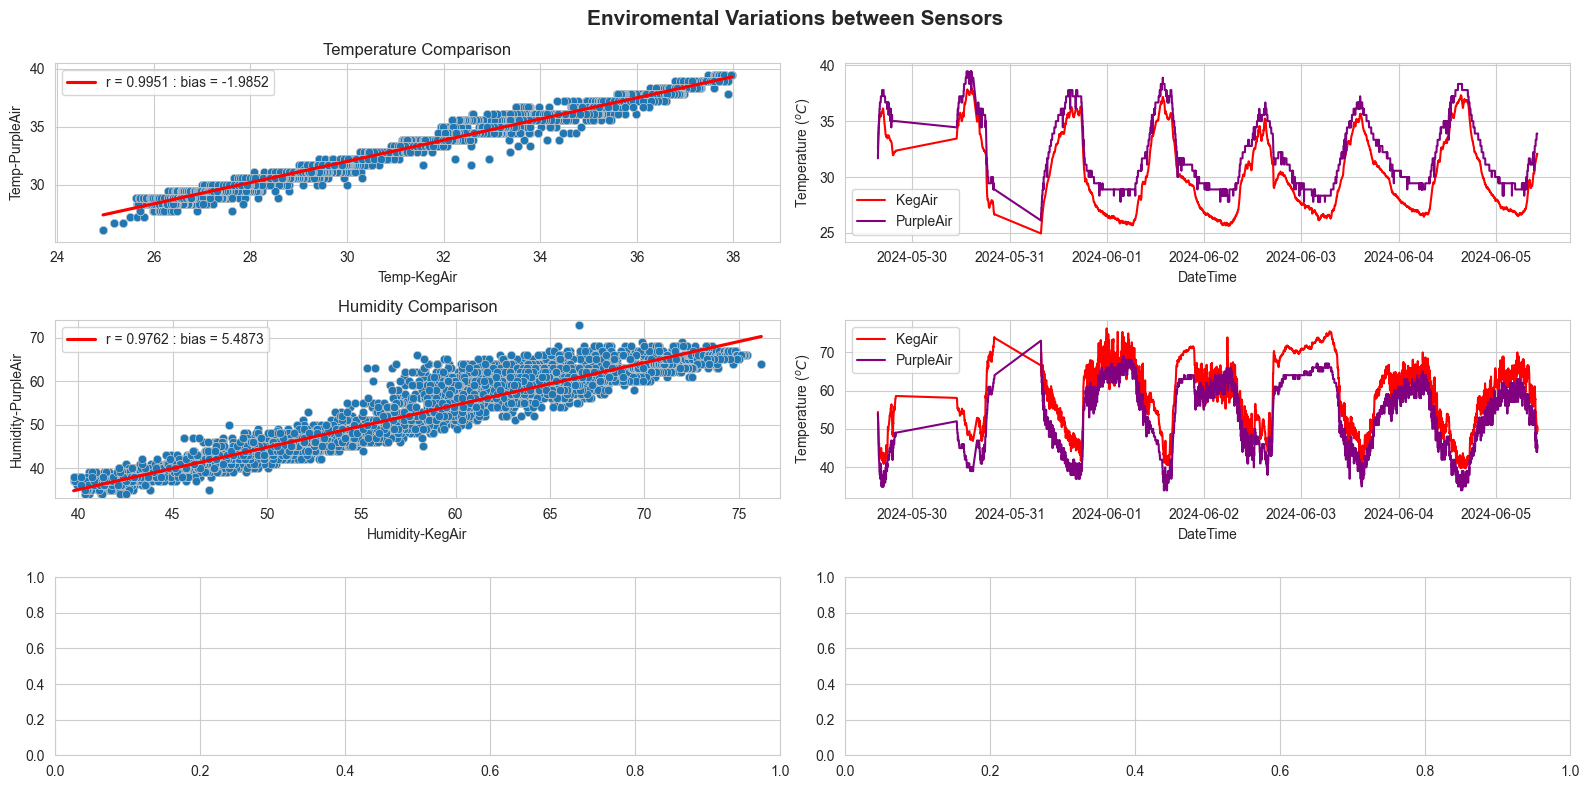

In [97]:
fig, axes = plt.subplots(3,2, figsize=(16, 8))

plt.suptitle('Enviromental Variations between Sensors', weight='bold', fontsize=15)


#Finding correlation coefficient and bias
def calc_corr_bias(env_val1, env_val2, df=total_df):
    corr = np.corrcoef(df[env_val1], df[env_val2]).mean().round(4)
    bias = ( df[env_val1]- df[env_val2]).mean().round(4)
    
    return corr, bias

#function to find the plot limits
def plot_limit(env_val1, env_val2, df=total_df):
    l_fact = 1
    x_lim = (df[env_val1].min()-l_fact, df[env_val1].max()+l_fact)
    y_lim = (df[env_val2].min()-l_fact, df[env_val2].max()+l_fact)
    
    return x_lim, y_lim
    

# for the first row Temperature
xt_b, yt_b = plot_limit('temp_c_keg', 'temp_c_ple')
print(f"X boundaries: {xt_b} \n Y bounds: {yt_b}")

#temperature corr and bias
temp_corr, temp_bias = calc_corr_bias('temp_c_keg', 'temp_c_ple')

sns.scatterplot(data=total_df, x='temp_c_keg', y='temp_c_ple', ec='#c9c9c9', ax=axes[0,0])
sns.regplot(data=total_df, x='temp_c_keg', y='temp_c_ple', scatter=False, 
            color='red', label=f'r = {temp_corr} : bias = {temp_bias}', ax=axes[0,0])
#using boundaries as limits
# axes[0,0].plot(np.arange(xt_b[0],xt_b[1]), np.arange(yt_b[0],yt_b[1]), label='x=y line', color='black')
axes[0,0].set_xlim(xt_b)
axes[0,0].set_ylim(yt_b)
axes[0,0].set_xlabel('Temp-KegAir')
axes[0,0].set_ylabel('Temp-PurpleAir')
axes[0,0].set_title('Temperature Comparison')
handles, labels = axes[0,0].get_legend_handles_labels()
axes[0,0].legend(handles, labels, loc='upper left')

sns.lineplot(data=total_df, x=total_df.index, y='temp_c_keg', label='KegAir', color='red', ax=axes[0,1])
sns.lineplot(data=total_df, x=total_df.index, y='temp_c_ple', label='PurpleAir', color='purple', ax=axes[0,1])
axes[0,1].set_ylabel('Temperature ($^oC$)')



# for row 2 Humidity
xh_b, yh_b = plot_limit('humidity_keg', 'humidity_ple')
print(f"X boundaries: {xh_b} \n Y bounds: {yh_b}")

#temperature corr and bias
hum_corr, hum_bias = calc_corr_bias('humidity_keg', 'humidity_ple')

sns.scatterplot(data=total_df, x='humidity_keg', y='humidity_ple', ec='#c9c9c9', ax=axes[1,0])
sns.regplot(data=total_df, x='humidity_keg', y='humidity_ple', scatter=False, 
            color='red', label=f'r = {hum_corr} : bias = {hum_bias}', ax=axes[1,0])
#using boundaries as limits
# axes[1,0].plot(np.arange(xh_b[0],xh_b[1]), np.arange(yh_b[0],yh_b[1]), label='x=y line', color='black')
axes[1,0].set_xlim(xh_b)
axes[1,0].set_ylim(yh_b)
axes[1,0].set_xlabel('Humidity-KegAir')
axes[1,0].set_ylabel('Humidity-PurpleAir')
axes[1,0].set_title('Humidity Comparison')
handles, labels = axes[1,0].get_legend_handles_labels()
axes[1,0].legend(handles, labels, loc='upper left')

sns.lineplot(data=total_df, x=total_df.index, y='humidity_keg', label='KegAir', color='red', ax=axes[1,1])
sns.lineplot(data=total_df, x=total_df.index, y='humidity_ple', label='PurpleAir', color='purple', ax=axes[1,1])
axes[1,1].set_ylabel('Temperature ($^oC$)')




row_titles = ["Temperature", "Humidity", "Pressure"]
# fig.suptitle(row_titles, y=0.9, ha='center')

sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

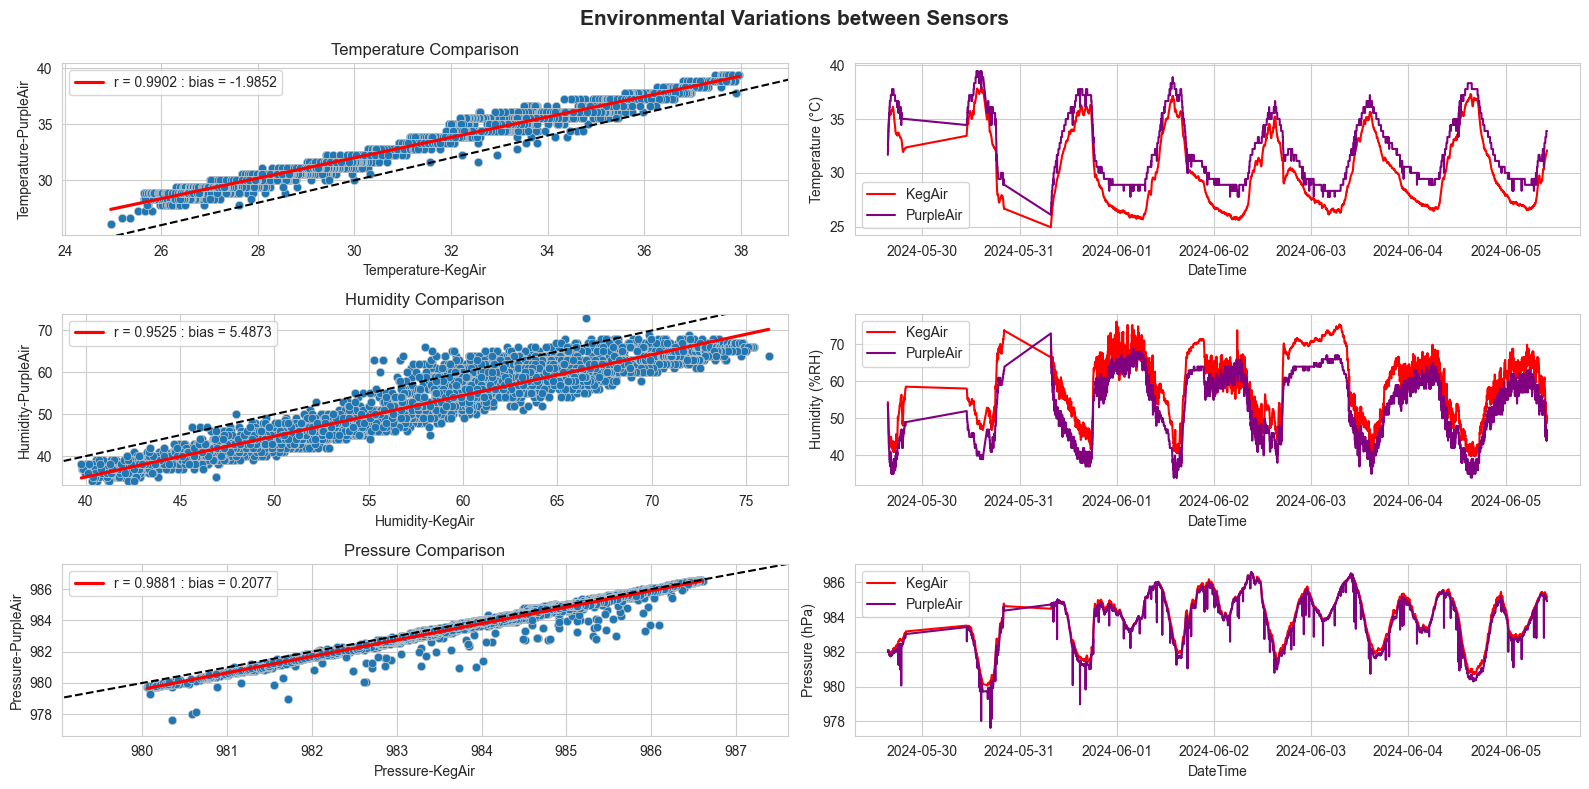

In [103]:
def calc_corr_bias(env_val1, env_val2, df):
    """Calculate correlation coefficient and bias."""
    corr = np.corrcoef(df[env_val1], df[env_val2])[0, 1].round(4)
    bias = (df[env_val1] - df[env_val2]).mean().round(4)
    return corr, bias

def plot_limit(env_val1, env_val2, df):
    """Determine plot limits."""
    l_fact = 1
    x_lim = (df[env_val1].min() - l_fact, df[env_val1].max() + l_fact)
    y_lim = (df[env_val2].min() - l_fact, df[env_val2].max() + l_fact)
    return x_lim, y_lim

def plot_scatter_and_line(variables, titles, df):
    """Plot scatter and line plots for given variables."""
    fig, axes = plt.subplots(len(variables), 2, figsize=(16, 8))
    plt.suptitle('Environmental Variations between Sensors', weight='bold', fontsize=15)

    units = ["(°C)", "(%RH)", "(hPa)"]
    
    for i, (var_pair, title) in enumerate(zip(variables, titles)):
        x_var, y_var = var_pair
        x_lim, y_lim = plot_limit(x_var, y_var, df)
        corr, bias = calc_corr_bias(x_var, y_var, df)

        # Scatter plot
        sns.scatterplot(data=df, x=x_var, y=y_var, ec='#c9c9c9', ax=axes[i, 0])
        sns.regplot(data=df, x=x_var, y=y_var, scatter=False, color='red', 
                    label=f'r = {corr} : bias = {bias}', ax=axes[i, 0])
        axes[i, 0].set_xlim(x_lim)
        axes[i, 0].set_ylim(y_lim)
        axes[i, 0].set_xlabel(f'{title}-KegAir')
        axes[i, 0].set_ylabel(f'{title}-PurpleAir')
        axes[i, 0].set_title(f'{title} Comparison')
        axes[i, 0].legend(loc='upper left')
        
        # Adding x=y line
        l_fact = 1
        min_val = min(df[x_var].min(), df[y_var].min()) - l_fact
        max_val = max(df[x_var].max(), df[y_var].max()) + l_fact
        axes[i, 0].plot([min_val, max_val], [min_val, max_val], 'k--', label='x=y line')

        # Line plot
        sns.lineplot(data=df, x=df.index, y=x_var, label='KegAir', color='red', ax=axes[i, 1])
        sns.lineplot(data=df, x=df.index, y=y_var, label='PurpleAir', color='purple', ax=axes[i, 1])
        axes[i, 1].set_ylabel(f'{title} {units[i]}')
        

    sns.set_style('whitegrid')
    plt.tight_layout()
    plt.savefig('images/env_gen.jpg', dpi=600)
    plt.show()

# Variables and titles for plotting
variables = [
    ('temp_c_keg', 'temp_c_ple'), 
    ('humidity_keg', 'humidity_ple'), 
    ('pressure_keg', 'pressure_ple') 
]
titles = ['Temperature', 'Humidity', 'Pressure']

# Plotting
plot_scatter_and_line(variables, titles, total_df)

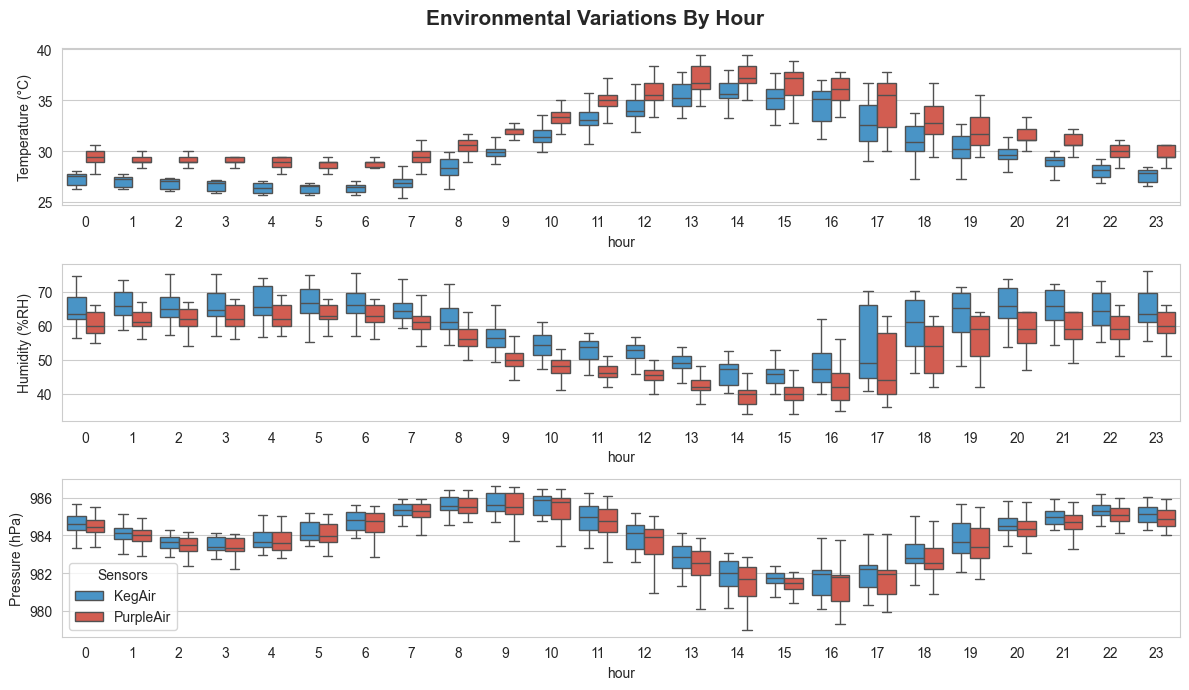

In [101]:
# Melting for temperature
def data_melt(var, keg_env, ple_env, df=total_df):
    melted = df.melt(id_vars=['hour'], value_vars=[keg_env, ple_env], var_name='Sensor', value_name=var)
    melted['Sensor'] = melted['Sensor'].map({keg_env: 'KegAir', ple_env: 'PurpleAir'})
    
    return melted

temp_melt = data_melt('Temperature', 'temp_c_keg', 'temp_c_ple')
humid_melt = data_melt('Humidity', 'humidity_keg', 'humidity_ple')
press_melt = data_melt('Pressure', 'pressure_keg', 'pressure_ple')


def plot_env_box(melt_df):
    fig, axes = plt.subplots(3, 1, figsize=(12, 7))
    plt.suptitle('Environmental Variations By Hour', weight='bold', fontsize=15)
    
    env_list = ['Temperature', 'Humidity', 'Pressure']
    units = ["(°C)", "(%RH)", "(hPa)"]
    colors = ["#3498db", "#e74c3c"]
    
    for i in list(range(3)):
        # Create the boxplot
        sns.boxplot(data=melt_df[i], x='hour', y=env_list[i], hue='Sensor', 
                    palette=colors, showfliers=False, ax=axes[i])
        axes[i].set_ylabel(f"{env_list[i]} {units[i]}")
        handles, labels = axes[i].get_legend_handles_labels()
        axes[i].get_legend().set_visible(False)
    
    plt.legend(handles, labels, title="Sensors")
    plt.tight_layout()
    plt.savefig('images/env_box.jpg', dpi=600)
    plt.show()


# Plotting boxplot for environmental variables
plot_env_box([temp_melt, humid_melt, press_melt])


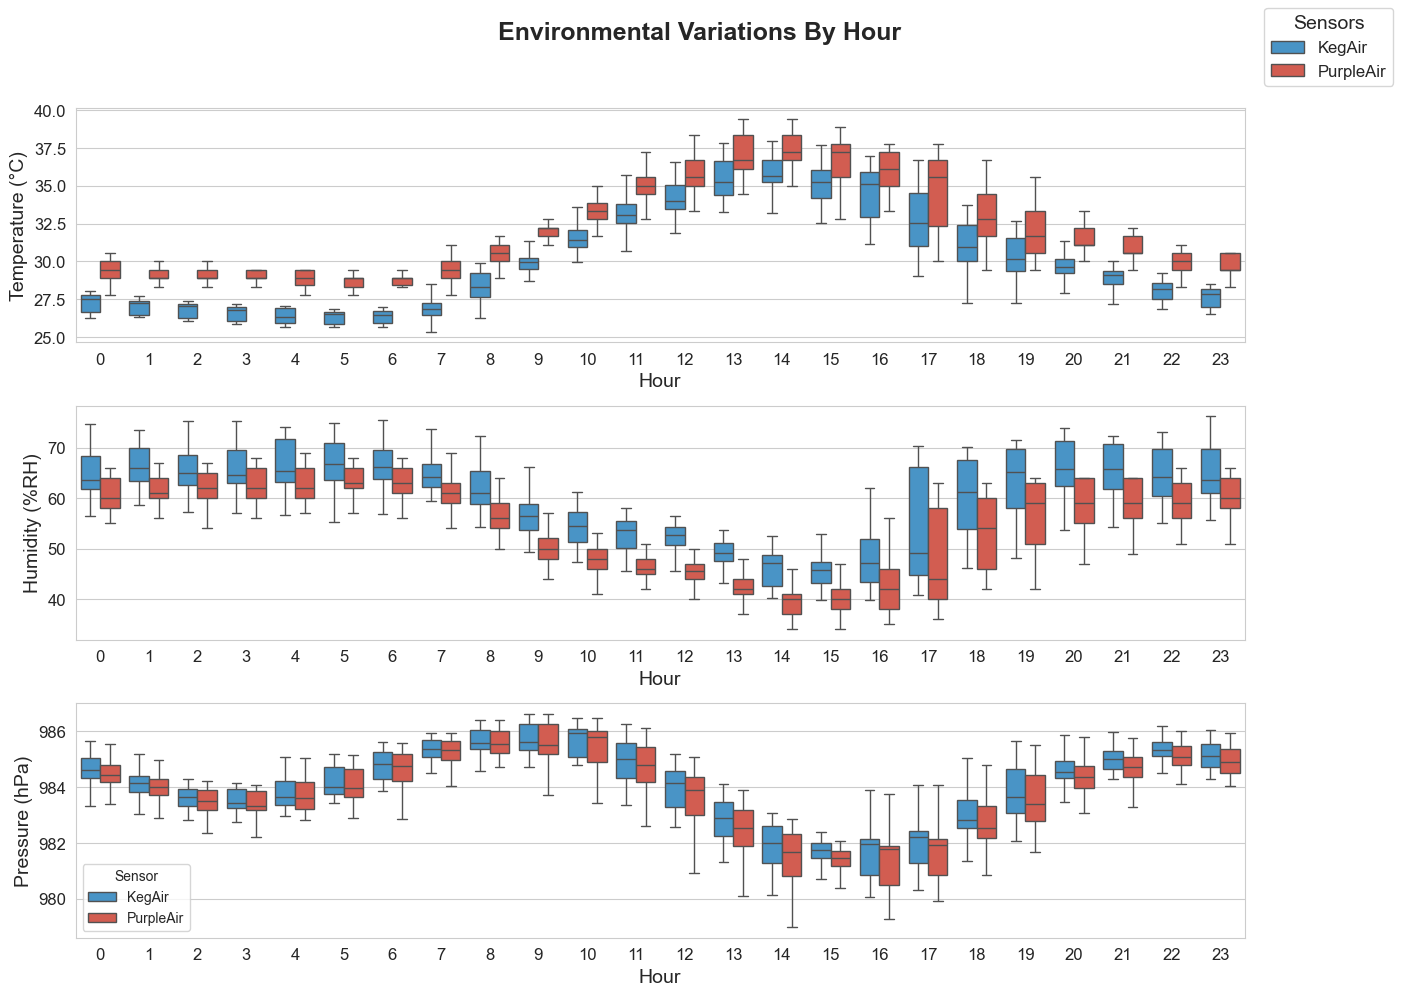

In [94]:

def plot_env_box_improved(melt_df):
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    plt.suptitle('Environmental Variations By Hour', weight='bold', fontsize=18)
    
    env_list = ['Temperature', 'Humidity', 'Pressure']
    units = ["(°C)", "(%RH)", "(hPa)"]
    colors = ["#3498db", "#e74c3c"]  # More pleasing color palette
    
    for i, env in enumerate(env_list):
        sns.boxplot(data=melt_df[i], x='hour', y=env, hue='Sensor', 
                    palette=colors, showfliers=False, ax=axes[i])
        axes[i].set_ylabel(f"{env} {units[i]}", fontsize=14)
        axes[i].set_xlabel("Hour", fontsize=14)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)
        if i < 2:  # Remove legend from all but the last plot for clarity
            axes[i].get_legend().remove()
    
    # Improve legend
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, title="Sensors", loc='upper right', fontsize=12, title_fontsize=14)
    
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Adjust layout to make room for the legend
    plt.show()

# Plotting the improved boxplot for environmental variables
plot_env_box_improved([temp_melt, humid_melt, press_melt])

In [61]:
press_melt

,hour,Sensor,Pressure
0,15,KegAir,982.1141
1,15,KegAir,982.0950
2,15,KegAir,982.0966
3,15,KegAir,982.0924
4,15,KegAir,982.0769
...,...,...,...
8091,10,PurpleAir,984.9700
8092,10,PurpleAir,984.9600
8093,10,PurpleAir,984.9400
8094,10,PurpleAir,984.9600


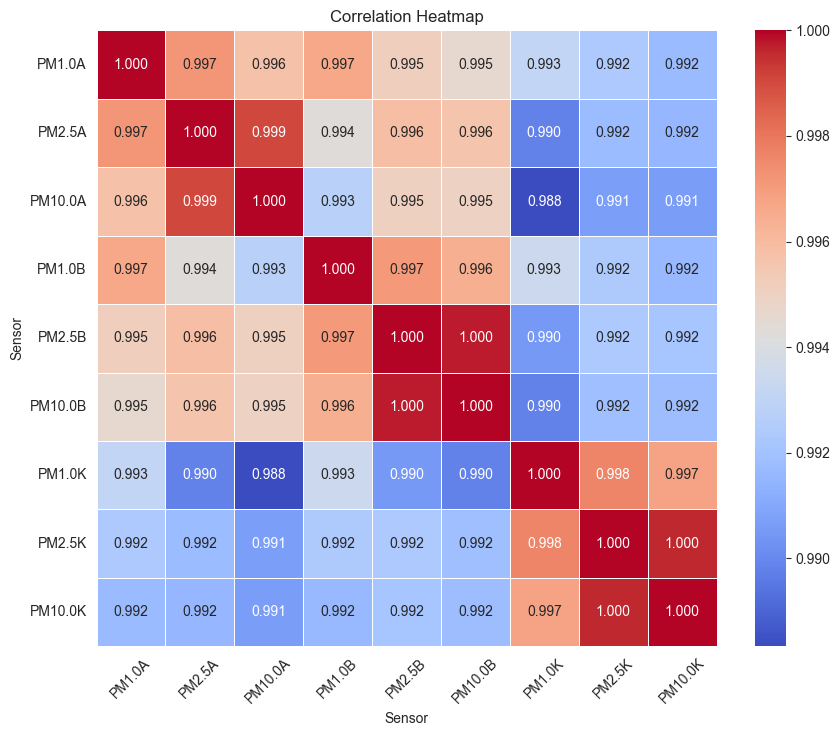

In [27]:
dat_mat = total_df[['pm1_0a', 'pm2_5a', 'pm10_0a', 'pm1_0b', 'pm2_5b', 'pm10_0b', 'pm1_0k', 'pm2_5k', 'pm10_0k']].corr()

map_mat = {'pm1_0a' : 'PM1.0A', 'pm2_5a': 'PM2.5A', 'pm10_0a' : 'PM10.0A',
            'pm1_0b' : 'PM1.0B', 'pm2_5b' : 'PM2.5B', 'pm10_0b': 'PM10.0B',
            'pm1_0k': 'PM1.0K', 'pm2_5k': 'PM2.5K', 'pm10_0k' : 'PM10.0K'}

dat_mat.rename(index=map_mat, columns=map_mat, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(dat_mat, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xlabel('Sensor')
plt.ylabel('Sensor')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [28]:
# Example usage with your data
bland_altman_plot(total_df['pm2_5k'], total_df['pm2_5a'])
bland_altman_plot(total_df['pm2_5k'], total_df['pm2_5b'])

NameError: name 'bland_altman_plot' is not defined

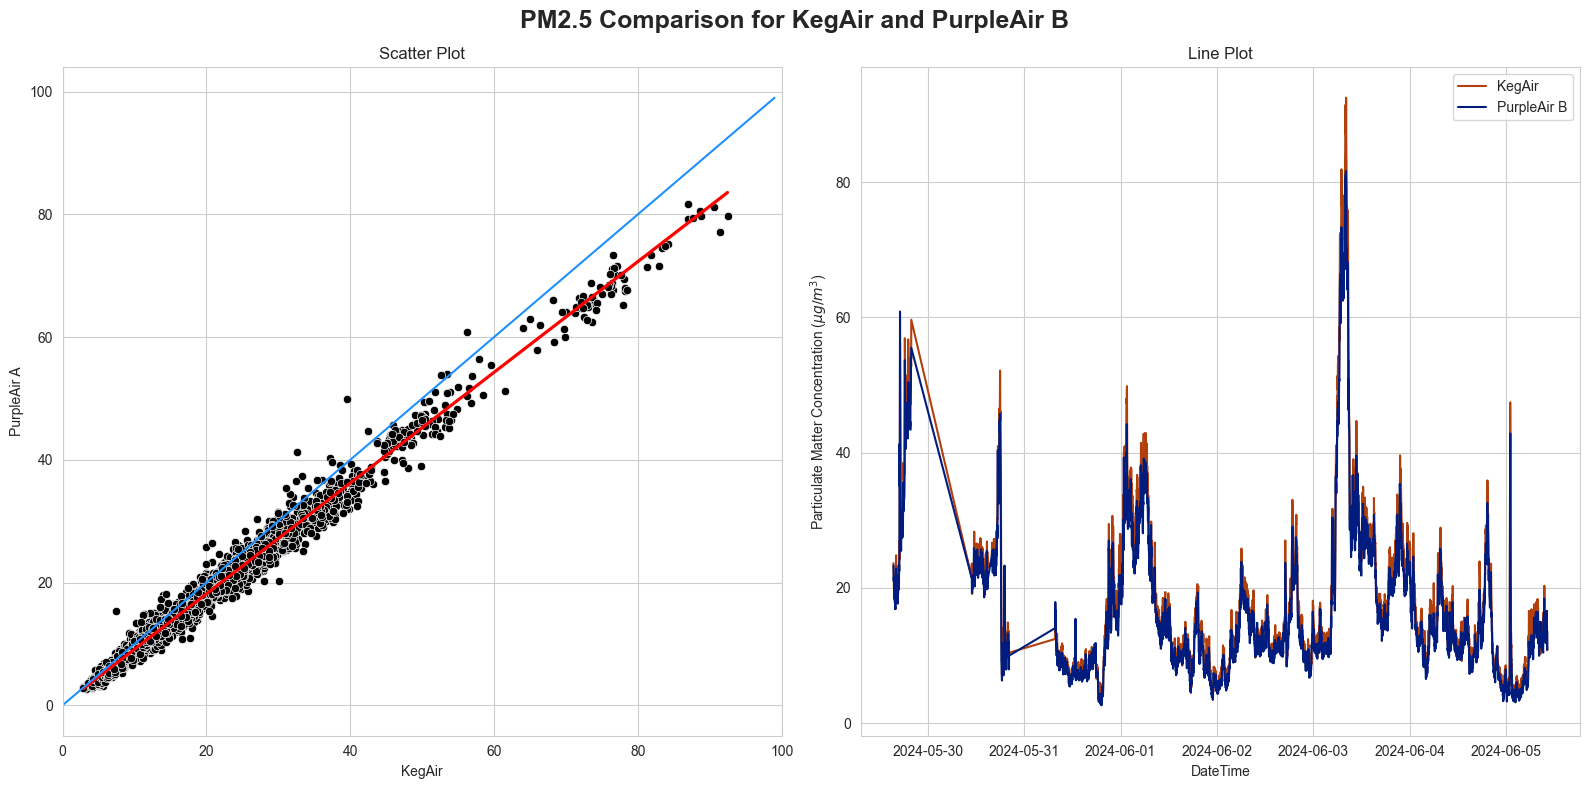

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

plt.suptitle('PM2.5 Comparison for KegAir and PurpleAir B', weight='bold', fontsize=18)

# scatter plot
sns.scatterplot(data=total_df, x='pm2_5k', y='pm2_5b', color='black', ax=ax1)
sns.regplot(data=total_df, x='pm2_5k', y='pm2_5b', color='red', scatter=False, ax=ax1)
ax1.set_xlabel('KegAir')
ax1.set_ylabel('PurpleAir A')
ax1.set_title('Scatter Plot')
ax1.set_xlim(0,100)
ax1.set_xlim(0,100)
ax1.plot(range(100), range(100), color='dodgerblue')

# line plot
sns.lineplot(data=total_df, x=total_df.index, y='pm2_5k', 
                label='KegAir', color="red", ax=ax2)
sns.lineplot(data=total_df, x=total_df.index, y='pm2_5b', 
                label='PurpleAir B', color="blue", ax=ax2)

ax2.set_ylabel('Particulate Matter Concentration ($\mu g/m^3$)')
ax2.set_title('Line Plot')

# # Customize legend
# handles, labels = ax1.get_legend_handles_labels()
# ax1.legend(handles, labels, title='Sizes', loc='upper left')

# Customize style
sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

In [ ]:
print(f"Sizes for Purple A: {len(total_df[total_df['pm2_5a'] < 50])}")
print(f"Sizes for KegAir: {len(total_df[total_df['pm2_5k'] < 50])}")

Sizes for Purple A: 3949
Sizes for KegAir: 3939


In [ ]:
# import tensorflow as tf

# with(tf.device('/device:GPU:1')):
#     sns.lmplot(data=total_df, x='pm2_5k', y='pm2_5a')

# %time

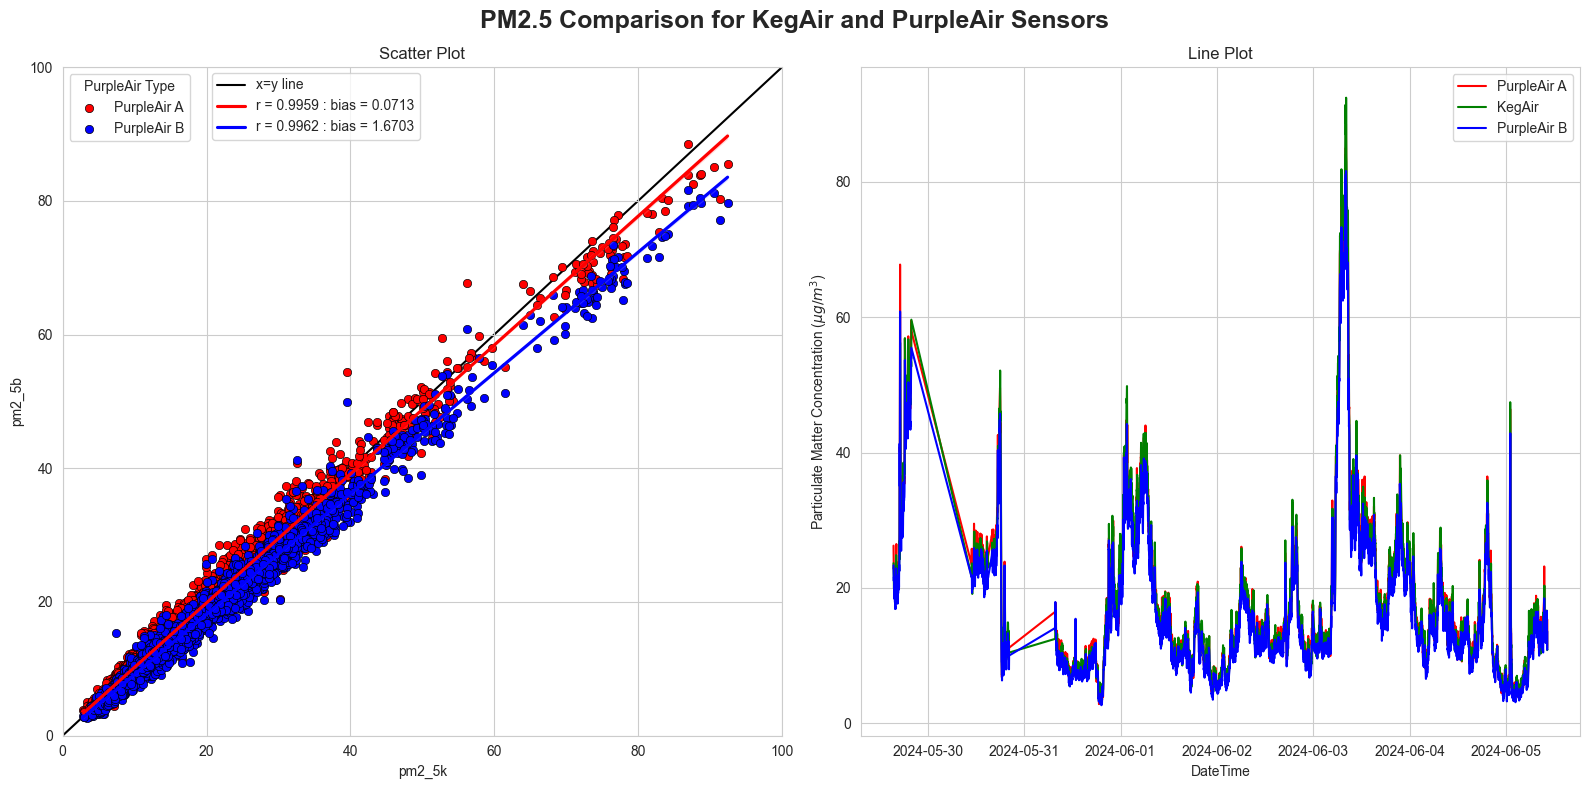

[<matplotlib.collections.PathCollection object at 0x000001E8BFD2E050>, <matplotlib.collections.PathCollection object at 0x000001E8C0070AF0>, <matplotlib.lines.Line2D object at 0x000001E8BFD2EEC0>, <matplotlib.lines.Line2D object at 0x000001E8C0071D50>, <matplotlib.lines.Line2D object at 0x000001E8C00723E0>] ['PurpleAir A', 'PurpleAir B', 'x=y line', 'r = 0.9959 : bias = 0.0713', 'r = 0.9962 : bias = 1.6703']


In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

plt.suptitle('PM2.5 Comparison for KegAir and PurpleAir Sensors', weight='bold', fontsize=18)

# scatter for purple A
sns.scatterplot(data=total_df, x='pm2_5k', y='pm2_5a', label='PurpleAir A', color='red', ec='black', ax=ax1)

# scatter for purple B
sns.scatterplot(data=total_df, x='pm2_5k', y='pm2_5b', label='PurpleAir B', color='blue', ec='black', ax=ax1)

#Finding correlation coefficient between pm2.5 readings
pcorr_a = np.corrcoef(total_df['pm2_5k'], total_df['pm2_5a']).mean()
pcorr_b = np.corrcoef(total_df['pm2_5k'], total_df['pm2_5b']).mean()

#finding the bias
def calculate_bias(df):
    # Calculate the bias between 'pm2_5k' and 'pm2_5a'
    bias_a = (df['pm2_5k'] - df['pm2_5a']).mean().round(4)
    bias_b = (df['pm2_5k'] - df['pm2_5b']).mean().round(4)
    
    return bias_a, bias_b

a_bias, b_bias = calculate_bias(total_df)


ax1.set_xlabel('KegAir')
ax1.set_ylabel('PurpleAir A & B')
ax1.set_title('Scatter Plot')
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)

ax1.plot(range(101), range(101), label='x=y line', color='black', zorder=-1)

#plotting the line of regression for both 
sns.regplot(data=total_df, x='pm2_5k', y='pm2_5a', label=f'r = {pcorr_a.round(4)} : bias = {a_bias}',
            color='red', scatter=False, ax=ax1)
sns.regplot(data=total_df, x='pm2_5k', y='pm2_5b', label=f'r = {pcorr_b.round(4)} : bias = {b_bias}', 
            color='blue', scatter=False, ax=ax1)


handles, labels = ax1.get_legend_handles_labels()

ax1.legend(handles[0:2], labels, title='PurpleAir Type', loc='upper left')
fig.legend(handles[2:], labels[2:], bbox_to_anchor=(0.27, 0.91), ncol=1)


## line plot
sns.lineplot(data=total_df, x=total_df.index, y='pm2_5a', 
                label='PurpleAir A', color='red', ax=ax2)
sns.lineplot(data=total_df, x=total_df.index, y='pm2_5k', 
                label='KegAir', color='green', ax=ax2)
sns.lineplot(data=total_df, x=total_df.index, y='pm2_5b', 
                label='PurpleAir B', color='blue', ax=ax2)

ax2.set_ylabel(r'Particulate Matter Concentration ($\mu g/m^3$)')
ax2.set_title('Line Plot')



# Customize style
sns.set_style('whitegrid')

plt.tight_layout()
plt.show()

print(handles, labels)